In [1]:
#!pip install pyspellchecker==0.5.6

In [2]:
#from spellchecker import SpellChecker
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import nltk
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from tqdm import tqdm
from multiprocessing import Pool
import os
from sklearn.metrics import log_loss

In [3]:
ham_path = '/kaggle/input/dataset-for-visual-based-spam-filtering/Final dataset/OCR_SpamHamEnron1Enron4SpamAssasin/OCR_SpamHamEnron1+Enron4+SpamAssasin/extracted_text_ham'
spam_path = '/kaggle/input/dataset-for-visual-based-spam-filtering/Final dataset/OCR_SpamHamEnron1Enron4SpamAssasin/OCR_SpamHamEnron1+Enron4+SpamAssasin/extracted_text_spam'

# Function to get data with spelling correction
def get_data(path, Label):
    file_contents = []
    ids = []
    for file in os.listdir(path):
        with open(os.path.join(path, file), encoding="ISO-8859-1") as f:
            content = f.read()
            #corrected_content = spell_checker.correction(content)  # Use correction instead of correct
            file_contents.append(content)
            ids.append(file[:-4])

    Labeled_data = []
    for content, id in zip(file_contents, ids):
        Labeled_data.append({'text': content, 'Text_ID': id, 'Label': Label})
    return Labeled_data

# Create a SpellChecker instance
#spell_checker = SpellChecker()

# Get data for ham and spam with spelling correction
ham = get_data(ham_path, 'ham')
spam = get_data(spam_path, 'spam')

# Shuffle the data
np.random.shuffle(ham)
np.random.shuffle(spam)

# Combine ham and spam data
data = ham + spam
np.random.shuffle(data) 

# Create a DataFrame
df = pd.DataFrame(data)
df.head()

 

# def get_data(path, Label):
#     file_contents = []
#     ids = []
#     for file in os.listdir(path):
#         with open(os.path.join(path, file), encoding="ISO-8859-1") as f:
#             file_contents.append(f.read())
#             ids.append(file[:-4])

#     Labeled_data = []
#     for content, id in zip(file_contents, ids):
#         Labeled_data.append({'text': content, 'text_ID': id, 'Label': Label})
#     return Labeled_data

# ham = get_data(ham_path, 'ham')
# spam = get_data(spam_path, 'spam')

# np.random.shuffle(ham)
# np.random.shuffle(spam)

# data = ham + spam
# np.random.shuffle(data) 

# df = pd.DataFrame(data)
# df.head()

,text,Text_ID,Label
0,Subject: kwbt bio - tech signs letter of inten...,emailimage_1628.2004-07-16.GP.spam.txt,spam
1,Subject: supply for midlothian daren - - fyi -...,emailimage_2177.2000-09-07.farmer.ham.txt,ham
2,Subject: start date : 2/2/02 ; hourahead hour ...,emailimage_ham__5779.2002-02-02.williams.ham,ham
3,Subject: prozacs meds 30 million people now re...,emailimage_1142.2004-05-18.GP.spam.txt,spam
4,Subject: re : noms / actual flow for 03 / 09 t...,emailimage_3761.2001-03-12.farmer.ham.txt,ham


In [4]:
df.shape

(7799, 3)

,text,Text_ID,Label,length
0,Subject: kwbt bio - tech signs letter of inten...,emailimage_1628.2004-07-16.GP.spam.txt,1,4006
1,Subject: supply for midlothian daren - - fyi -...,emailimage_2177.2000-09-07.farmer.ham.txt,0,487
2,Subject: start date : 2/2/02 ; hourahead hour ...,emailimage_ham__5779.2002-02-02.williams.ham,0,278
3,Subject: prozacs meds 30 million people now re...,emailimage_1142.2004-05-18.GP.spam.txt,1,225
4,Subject: re : noms / actual flow for 03 / 09 t...,emailimage_3761.2001-03-12.farmer.ham.txt,0,509


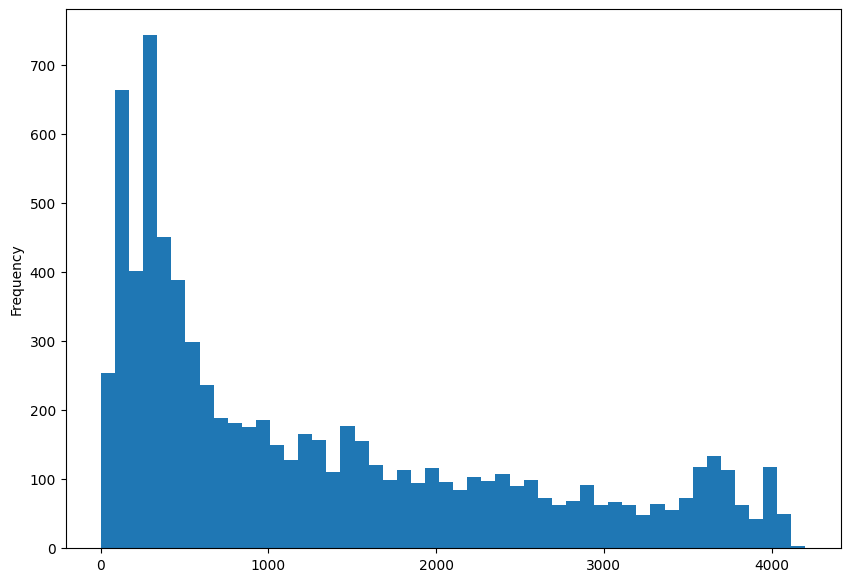

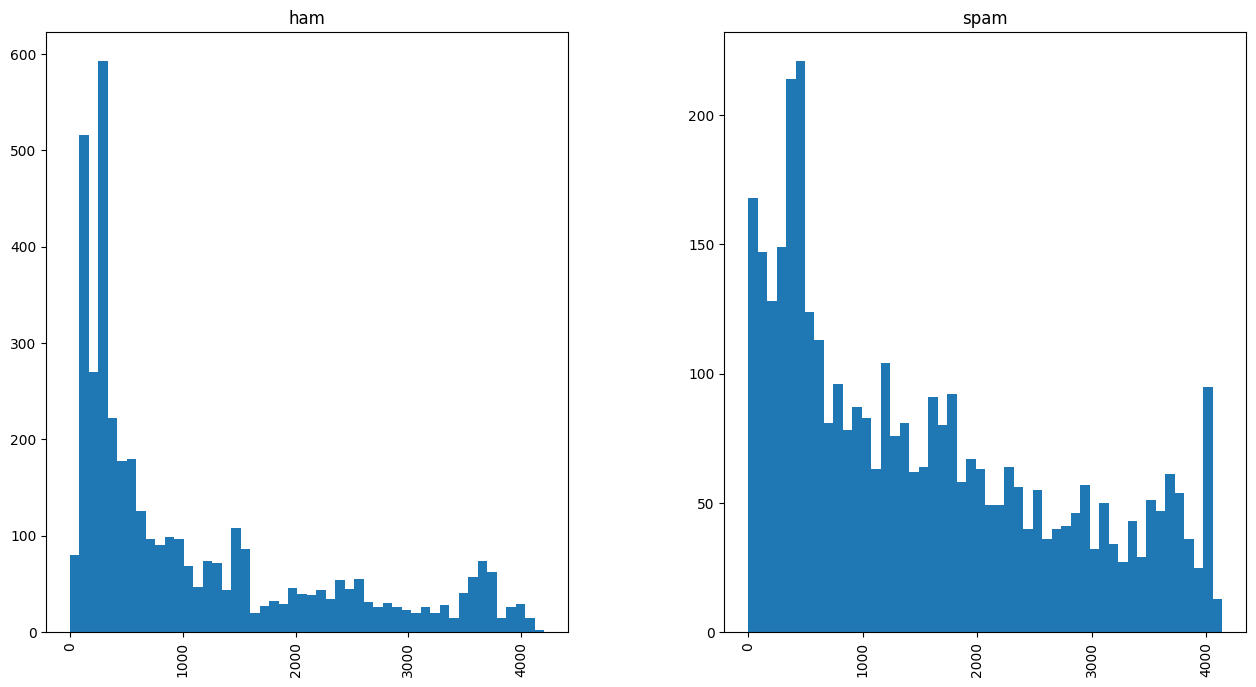

In [5]:
def extract_email_info(email_text):
    lines = email_text.split('\n')

    content = ''
    sender = ''
    recipient = ''
    subject = ''
    date = ''

    for line in lines:
        if line.startswith('Subject:'):
            subject = line.replace('Subject:', '').strip()
        elif line.startswith('From:'):
            sender = line.replace('From:', '').strip()
        elif line.startswith('To:'):
            recipient = line.replace('To:', '').strip()
        elif line.startswith('Date:'):
            date = line.replace('Date:', '').strip()
        elif line.startswith('Date:'):
            date = line.replace('Received:', '').strip()
        elif line.startswith('X-'):
            continue
        else:
            content += line.strip()

    return {'sender': sender, 'recipient': recipient, 'subject': subject, 'date': date, 'content': content}

# Applying the function to the DataFrame
#df['extracted_info'] = df['text'].apply(extract_email_info)

# Creating new columns based on extracted information
#df[['sender', 'recipient', 'subject', 'date', 'content']] = df['extracted_info'].apply(pd.Series)

# Dropping unnecessary columns
#df.drop(['text', 'extracted_info'], axis=1, inplace=True)

# Displaying the modified DataFrame
df.head()
    

df['length']=df['text'].apply(len)
df.head()


df['length'].plot(bins=50, kind='hist',figsize=(10,7))

df.hist(column='length', by='Label', bins=50, figsize=(15,8))

df.loc[:,'Label']=df.Label.map({'ham':0, 'spam':1})
df.head()


In [6]:
#text

In [7]:
count=CountVectorizer()


train_IDs = pd.read_csv('/kaggle/input/stacking-binary/train_IDs.csv')
test_IDs = pd.read_csv('/kaggle/input/stacking-binary/test_IDs.csv')
train = df[df["Text_ID"].isin(train_IDs["Image_ID"])]
test = df[df["Text_ID"].isin(test_IDs["Image_ID"])]

print("Train DataFrame shape:", train.shape)
print("Test DataFrame shape:", test.shape)

x_train=count.fit_transform(train['text'])
x_test = count.transform(test['text'])

y_train, y_test = train["Label"], test["Label"]
models = {
#'Logistic Regression': LogisticRegression(),
#'Decision Tree': DecisionTreeClassifier(),
'Naive Bayes': GaussianNB(),
'Decision Tree' : DecisionTreeClassifier(),
 
#'Support Vector Machine' : SVC()
        }


Train DataFrame shape: (6239, 4)
Test DataFrame shape: (1560, 4)


In [8]:
y_train.dtype

dtype('O')

In [9]:
for name, model in tqdm(models.items()):
    model.fit(x_train.toarray(), y_train.astype('int'))
    test_pred = model.predict(x_test.toarray())
    train_pred = model.predict(x_train.toarray())
    train_pred_proba = model.predict_proba(x_train.toarray())
    test_pred_proba = model.predict_proba(x_test.toarray())
    train_log_loss = log_loss(y_train.astype('int'), train_pred_proba)
    test_log_loss = log_loss(y_test.astype('int'), test_pred_proba)
    print(f"Model: {name}")
    print("Classification Report:")
    print(classification_report(y_test.astype('int'), test_pred.astype('int')))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test.astype('int'), test_pred.astype('int')))
    print("\n")
    
    print(f"Train Log Loss: {train_log_loss}")
    print(f"Test Log Loss: {test_log_loss}")
    
    # Save predictions to CSV files
    train_pred_df = train[['Text_ID', 'Label']].copy()
    train_pred_proba_df = train[['Text_ID', 'Label']].copy()
    train_pred_df['Label'] = train_pred
    train_pred_proba_df['Label'] = train_pred_proba
    train_pred_df.to_csv(f"{name}_Train_Prediction.csv", index=False)
    train_pred_proba_df.to_csv(f"{name}_Train_Prediction_Prob.csv", index=False)
    
    test_pred_df = test[['Text_ID', 'Label']].copy()
    test_pred_proba_df = test[['Text_ID', 'Label']].copy()
    test_pred_df['Label'] = test_pred
    test_pred_proba_df['Label'] = test_pred_proba
    test_pred_df.to_csv(f"{name}_Test_Prediction.csv", index=False)
    test_pred_proba_df.to_csv(f"{name}_Test_Prediction_Prob.csv", index=False)

 33%|███▎      | 1/3 [00:15<00:30, 15.07s/it]

Model: Naive Bayes
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       816
           1       0.97      0.94      0.95       744

    accuracy                           0.96      1560
   macro avg       0.96      0.95      0.95      1560
weighted avg       0.96      0.96      0.96      1560

Confusion Matrix:
[[794  22]
 [ 48 696]]


Train Log Loss: 0.42750927244665343
Test Log Loss: 1.617343421306539


 67%|██████▋   | 2/3 [01:11<00:39, 39.16s/it]

Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       816
           1       0.95      0.98      0.96       744

    accuracy                           0.97      1560
   macro avg       0.97      0.97      0.97      1560
weighted avg       0.97      0.97      0.97      1560

Confusion Matrix:
[[780  36]
 [ 17 727]]


Train Log Loss: 0.0005995618751890899
Test Log Loss: 1.224808244070535


100%|██████████| 3/3 [01:47<00:00, 36.00s/it]

Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       816
           1       0.96      1.00      0.98       744

    accuracy                           0.98      1560
   macro avg       0.98      0.98      0.98      1560
weighted avg       0.98      0.98      0.98      1560

Confusion Matrix:
[[785  31]
 [  0 744]]


Train Log Loss: 0.03768256077917875
Test Log Loss: 0.11791154564719543


In [10]:
# NB_Train_Predicition = train[['Text_ID','Label']].copy()
# NB_Train_Predicition_Prob = train[['Text_ID','Label']].copy()
# NB_Train_Predicition['Label'] = train_pred
# NB_Train_Predicition_Prob['Label'] = train_pred_proba
# NB_Train_Predicition.to_csv("NB_Train_Predicition.csv")
# NB_Train_Predicition_Prob.to_csv("NB_Train_Predicition_Prob.csv")


In [11]:
# NB_Test_Predicition = test[['Text_ID','Label']].copy()
# NB_Test_Predicition_Prob = Test[['Text_ID','Label']].copy()
# NB_Test_Predicition['Label'] = test_pred
# NB_Test_Predicition_Prob['Label'] = test_pred_proba
# NB_Test_Predicition.to_csv("NB_Test_Predicition.csv")
# NB_Test_Predicition_Prob.to_csv("NB_Test_Predicition_Prob.csv")


In [12]:
#pd.DataFrame(train[['text_ID','Label']]).to_csv("Train_Truth_Ground.csv")
#pd.DataFrame(test[['text_ID','Label']]).to_csv("Test_Truth_Ground.csv")